In [2]:
import pandas as pd

In [31]:
fake = pd.read_csv("News _dataset/Fake.csv")
true = pd.read_csv("News _dataset/True.csv")

In [32]:
fake['fake'] = 1
true['fake'] = 0

In [33]:
data = pd.concat([fake, true], axis=0, ignore_index=True)

In [5]:
data.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
data.shape

(44898, 5)

In [34]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('all-MiniLM-L6-v2')

text = data['title'].astype(str) + ' ' + data['text'].astype(str)
text = text.to_list()

embeddings = embedder.encode(text, batch_size=32, show_progress_bar=True)


data['text embeddings'] = embeddings.tolist()


Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

In [35]:
data

,title,text,subject,date,fake,text embeddings
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,"[-0.014680209569633007, 0.015312690287828445, ..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,"[-0.02636757306754589, -0.0013348733773455024,..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,"[-0.048441044986248016, -0.0024046229664236307..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,"[0.048561740666627884, 0.014833304099738598, 0..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,"[0.05269085615873337, 0.13794627785682678, 0.0..."
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,"[-0.010507103987038136, -0.02351418137550354, ..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,"[-0.018677379935979843, -0.002469006460160017,..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,"[0.0949980616569519, 0.006277489475905895, -0...."
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,"[0.008133535273373127, -0.06180597096681595, -..."


In [36]:
emb_dim = embeddings.shape[1]
emb_cols = [f"emb_{i}" for i in range(emb_dim)]
# make a DataFrame of shape (n_samples, emb_dim)
emb_df = pd.DataFrame(embeddings, columns=emb_cols)
# concatenate back onto your original data
data = pd.concat([data.reset_index(drop=True), emb_df], axis=1)

In [37]:
data

,title,text,subject,date,fake,text embeddings,emb_0,emb_1,emb_2,emb_3,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,"[-0.014680209569633007, 0.015312690287828445, ...",-0.014680,0.015313,0.136109,-0.041587,...,0.089822,0.009877,-0.016314,0.025938,0.021598,0.025511,0.105602,-0.015855,-0.033690,0.059743
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,"[-0.02636757306754589, -0.0013348733773455024,...",-0.026368,-0.001335,0.013900,-0.009886,...,0.060731,-0.014930,0.031203,0.040325,-0.063591,-0.044919,0.071214,0.011077,0.091840,-0.043734
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,"[-0.048441044986248016, -0.0024046229664236307...",-0.048441,-0.002405,-0.097637,-0.022930,...,0.016166,-0.016902,-0.037304,0.026422,-0.091611,0.084467,-0.004984,-0.042255,0.002914,-0.029962
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,"[0.048561740666627884, 0.014833304099738598, 0...",0.048562,0.014833,0.025571,-0.015817,...,0.072385,-0.041408,0.008768,-0.054116,-0.034278,-0.014013,0.037399,-0.025411,-0.022180,0.062437
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,"[0.05269085615873337, 0.13794627785682678, 0.0...",0.052691,0.137946,0.055639,0.002886,...,0.064660,0.026969,0.002800,0.018944,0.040889,0.022161,0.049786,-0.039246,0.006106,0.028587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,"[-0.010507103987038136, -0.02351418137550354, ...",-0.010507,-0.023514,0.066983,0.000096,...,0.043614,0.009004,0.004893,-0.009410,-0.011711,-0.010425,-0.017675,-0.094640,-0.013945,0.008623
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,"[-0.018677379935979843, -0.002469006460160017,...",-0.018677,-0.002469,0.054797,-0.002338,...,-0.069693,0.005616,-0.048851,0.043149,-0.040072,-0.025064,0.032435,-0.097786,0.066812,0.062912
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,"[0.0949980616569519, 0.006277489475905895, -0....",0.094998,0.006277,-0.055823,-0.007307,...,0.063969,-0.037079,-0.056731,-0.056168,0.005093,0.045660,-0.069502,-0.043431,0.044476,-0.068227
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,"[0.008133535273373127, -0.06180597096681595, -...",0.008134,-0.061806,-0.009018,0.040867,...,-0.017335,0.018277,0.001959,0.015472,-0.020712,-0.066342,-0.097646,-0.095700,-0.046756,-0.055516


<Figure size 800x200 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 800x200 with 0 Axes>

<Figure size 800x200 with 0 Axes>

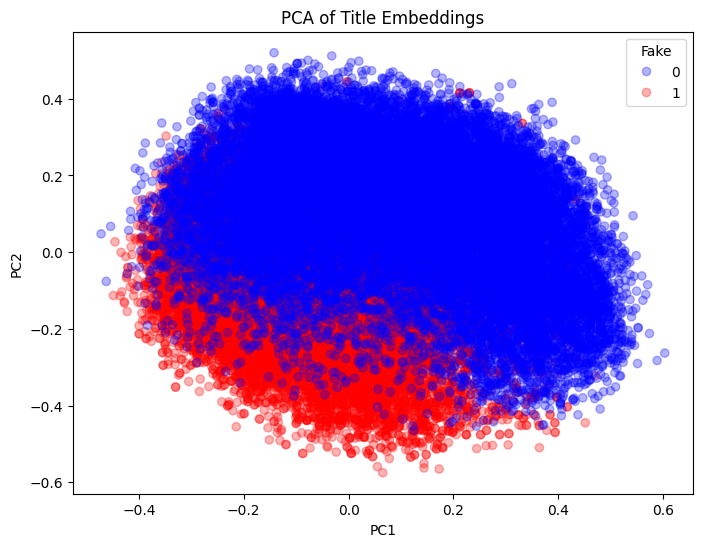

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# prepare feature matrix and labels
feature_cols = [col for col in data.columns if col.startswith("emb_")]
X = data[feature_cols].values
y = data['fake'].astype(int).values

# run PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='bwr', alpha=0.3
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Title Embeddings')
plt.legend(*scatter.legend_elements(), title='Fake')
plt.show()


In [39]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train
clf = LogisticRegression()
clf.fit(X_train, y_train)

# predict & evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.9458797327394209

Classification Report:
               precision    recall  f1-score   support

           0     0.9348    0.9520    0.9433      4247
           1     0.9562    0.9404    0.9482      4733

    accuracy                         0.9459      8980
   macro avg     0.9455    0.9462    0.9458      8980
weighted avg     0.9461    0.9459    0.9459      8980



In [47]:
from sklearn.ensemble import RandomForestClassifier

# 2) Train a Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 3) Predict & evaluate
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {acc_rf:.6f}")
print(
    "\nRandom Forest Classification Report:\n",
    classification_report(y_test, y_pred_rf, digits=4)
)


Random Forest Accuracy: 0.931960

Random Forest Classification Report:
               precision    recall  f1-score   support

           0     0.9316    0.9239    0.9278      4247
           1     0.9323    0.9392    0.9357      4733

    accuracy                         0.9320      8980
   macro avg     0.9319    0.9315    0.9317      8980
weighted avg     0.9320    0.9320    0.9319      8980



In [41]:
import numpy as np
np.bool = bool
np.int = int
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
input_dim = X_train.shape[1]



In [42]:
model = models.Sequential([
  layers.Input(shape=(input_dim,)),
  
  layers.Dense(256),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.4),
  
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.4),

  layers.Dense(64),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.3),

  layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ———————— 3) Train ————————
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

# ———————— 4) Evaluate ————————
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Generate precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=['real', 'fake'],
    digits=4
))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,569 (553.00 KB)

 Trainable params: 140,673 (549.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8589 - loss: 0.3128 - val_accuracy: 0.9539 - val_loss: 0.1562
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9521 - loss: 0.1275 - val_accuracy: 0.9592 - val_loss: 0.1046
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9603 - loss: 0.1052 - val_accuracy: 0.9659 - val_loss: 0.0902
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9643 - loss: 0.0936 - val_accuracy: 0.9670 - val_loss: 0.0886
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9683 - loss: 0.0815 - val_accuracy: 0.9715 - val_loss: 0.0810
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9727 - loss: 0.0714 - val_accuracy: 0.9710 - val_loss: 0.0807
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9761 - loss: 0.0620 - val_accuracy: 0.9702 - val_loss: 0.0837
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9785 - loss: 0.0594 - val_acc

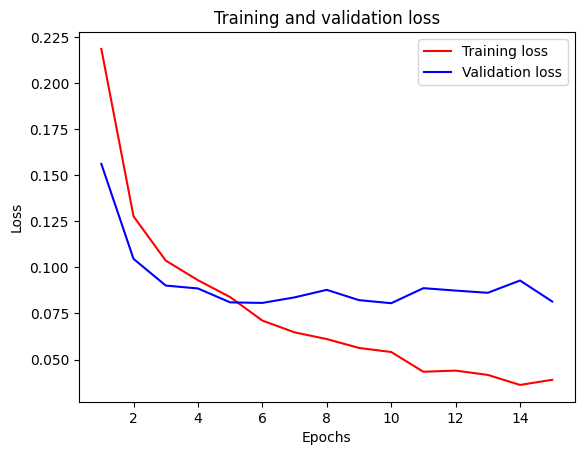

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer(max_features=5000)
docs = (data['title'].astype(str) + " " + data['text'].astype(str)).tolist()
tfidf_matrix = tfidf.fit_transform(docs)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)
X = tfidf_df.values
y = data['fake'].astype(int).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
input_dim = X_train.shape[1]

In [12]:
model = models.Sequential([
  layers.Input(shape=(input_dim,)),
  
  layers.Dense(256),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.4),
  
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.4),

  layers.Dense(64),
  layers.BatchNormalization(),
  layers.Activation('gelu'),
  layers.Dropout(0.3),

  layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ———————— 3) Train ————————
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

# ———————— 4) Evaluate ————————
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

2025-05-02 11:41:39.687208: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-05-02 11:41:39.687401: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-02 11:41:39.687415: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1746200499.687836 5371622 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746200499.688324 5371622 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,265 (5.05 MB)

 Trainable params: 1,322,369 (5.04 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20


2025-05-02 11:41:41.561838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9338 - loss: 0.1688 - val_accuracy: 0.9880 - val_loss: 0.0629
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9944 - loss: 0.0188 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9921 - val_loss: 0.0267
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9923 - val_loss: 0.0294
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9910 - val_loss: 0.0347
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9921 - val_loss: 0.0301
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9975 - loss: 0.0061 - val_accuracy: 0.9916 - val_loss: 0.0284
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.99

In [151]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Generate precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=['class 0', 'class 1'],
    digits=4
))


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9921

Classification Report:
              precision    recall  f1-score   support

     class 0     0.9922    0.9911    0.9916      4247
     class 1     0.9920    0.9930    0.9925      4733

    accuracy                         0.9921      8980
   macro avg     0.9921    0.9920    0.9921      8980
weighted avg     0.9921    0.9921    0.9921      8980



In [ ]:
import visualkeras
from PIL import ImageFont

In [74]:
visualkeras.graph_view(
    model,
    to_file="mlp_graph.png",
    node_spacing= 20,
)
print("Saved graph-view diagram to /mnt/data/pretty_mlp_graph.png")

Saved graph-view diagram to /mnt/data/pretty_mlp_graph.png


ValueError: Could not save to JPEG for display

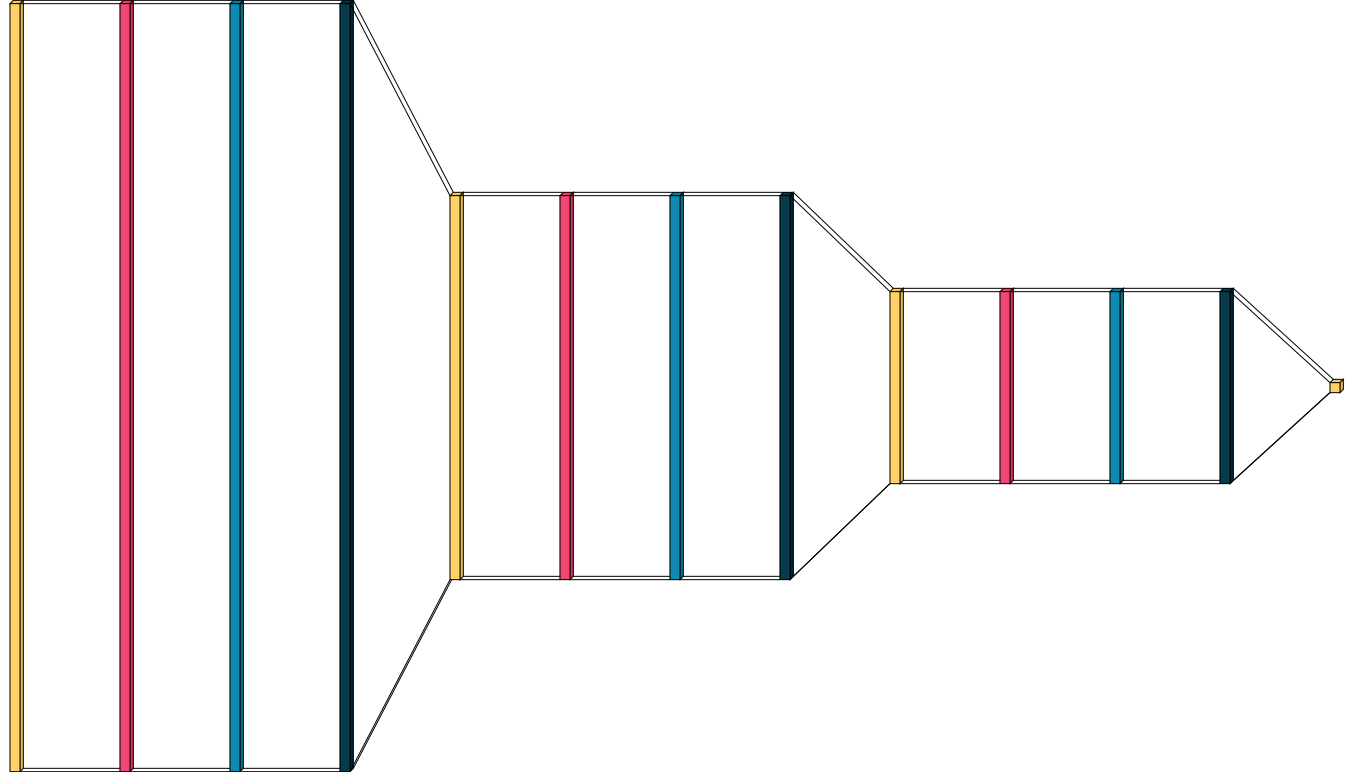

In [94]:
visualkeras.layered_view(model, to_file='spam.png', min_xy=10, min_z=10, scale_xy=3, scale_z=2, one_dim_orientation='y',spacing=100)

In [14]:
import shap

In [96]:
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


array([[9.9995089e-01],
       [7.3408075e-03],
       [5.6097437e-05],
       [9.1436386e-01],
       [4.9861833e-03]], dtype=float32)

In [53]:
# 1) Wrap your pipeline as before
def f_proba(texts: list[str]) -> np.ndarray:
    # 1a) embed your texts
    embs = embedder.encode(texts, batch_size=32, show_progress_bar=False)
    # 1b) get your fake‐class probs as (N,1)
    fake_probs = model.predict(embs, batch_size=32)
    # 1c) real = 1 − fake
    real_probs = 1.0 - fake_probs
    # 1d) stack into shape (N,2)
    return np.hstack([real_probs, fake_probs])

# 2) Create a text masker (uses whitespace tokenization)
masker = shap.maskers.Text()  

# 3) Build the explainer with that masker
explainer = shap.Explainer(f_proba, masker, output_names=['real', "fake"])
# 4) Explain a single title
idx = 1
title = "RFK Says New Parents 'Should Not Trust the Deceptive CDC' with Their Children's Health"
shap_values = explainer([title])  # pass a list of 1 item


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [30]:
# 1) Wrap your pipeline as before
def f_proba(texts: list[str]) -> np.ndarray:
    # 1a) embed your texts
    embs = tfidf.transform(texts).toarray()
    # 1b) get your fake‐class probs as (N,1)
    fake_probs = model.predict(embs, batch_size=32)
    # 1c) real = 1 − fake
    real_probs = 1.0 - fake_probs
    # 1d) stack into shape (N,2)
    return np.hstack([real_probs, fake_probs])

# 2) Create a text masker (uses whitespace tokenization)
masker = shap.maskers.Text()  

# 3) Build the explainer with that masker
explainer = shap.Explainer(f_proba, masker, output_names=['real', "fake"])
# 4) Explain a single title
idx = 1
title = "FBI Insider: Epstein Victims Are Being Murdered to Protect VIP Pedophiles"
shap_values = explainer([title])  # pass a list of 1 item

shap.plots.text(shap_values[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [54]:
import matplotlib.pyplot as plt

# 1) Grab the single‐sample Explanation
exp = shap_values[0]              # an Explanation object

# 2) Extract tokens, the SHAP values for “fake” (class index 1), and the base value
tokens     = exp.data             # list of your title’s tokens
fake_vals  = exp.values[:, 1]     # SHAP contributions toward “fake”
base_value = exp.base_values[1]   # baseline P(fake)

# 3) Draw the force plot using Matplotlib
plt.figure(figsize=(8,2))  # you can tweak size
_ = shap.force_plot(
    base_value,
    fake_vals,
    tokens,
    matplotlib=True,
    show=False
)

# 4) Save it out
out_path = "shap_force_tokens.png"
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Saved force‐plot PNG to {out_path}")


Saved force‐plot PNG to shap_force_tokens.png
